In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima -q
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [10]:
data = pd.read_csv("monthly_sales_after_filter_with_lags.csv")

In [11]:
data

,InvoiceDate,sales,sales_lag1,sales_lag2,sales_lag3,rolling_mean_3,rolling_mean_6
0,2009-12-31,761869.310,NaN,NaN,NaN,NaN,NaN
1,2010-01-31,597185.252,761869.310,NaN,NaN,NaN,NaN
2,2010-02-28,524027.916,597185.252,761869.310,NaN,6.276942e+05,NaN
3,2010-03-31,804381.321,524027.916,597185.252,761869.310,6.418648e+05,NaN
4,2010-04-30,676025.302,804381.321,524027.916,597185.252,6.681448e+05,NaN
5,2010-05-31,652489.880,676025.302,804381.321,524027.916,7.109655e+05,6.693298e+05
6,2010-06-30,747090.410,652489.880,676025.302,804381.321,6.918685e+05,6.668667e+05
7,2010-07-31,649417.920,747090.410,652489.880,676025.302,6.829994e+05,6.755721e+05
8,2010-08-31,695713.360,649417.920,747090.410,652489.880,6.974072e+05,7.041864e+05
9,2010-09-30,920661.981,695713.360,649417.920,747090.410,7.552644e+05,7.235665e+05


In [12]:
data['sales_lag1'].fillna(method='backfill', inplace=True)
data['sales_lag2'].fillna(method='backfill', inplace=True)
data['sales_lag3'].fillna(method='backfill', inplace=True)
data['rolling_mean_3'].fillna(method='backfill', inplace=True)
data['rolling_mean_6'].fillna(method='backfill', inplace=True)

In [13]:
data.head()

,InvoiceDate,sales,sales_lag1,sales_lag2,sales_lag3,rolling_mean_3,rolling_mean_6
0,2009-12-31,761869.310,761869.310,761869.310,761869.310,627694.159333,669329.830167
1,2010-01-31,597185.252,761869.310,761869.310,761869.310,627694.159333,669329.830167
2,2010-02-28,524027.916,597185.252,761869.310,761869.310,627694.159333,669329.830167
3,2010-03-31,804381.321,524027.916,597185.252,761869.310,641864.829667,669329.830167
4,2010-04-30,676025.302,804381.321,524027.916,597185.252,668144.846333,669329.830167


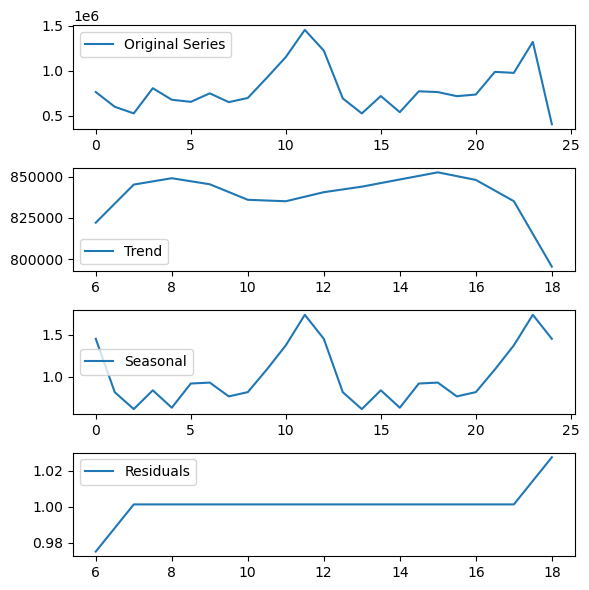

In [14]:
result = seasonal_decompose(data['sales'], model='multiplicative', period=12)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(6,6))

plt.subplot(4, 1, 1)
plt.plot(data['sales'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], infer_datetime_format=True)
data = data.set_index(['InvoiceDate'])
data['month_index'] = data.index.month

In [16]:
SARIMAX_model = pm.auto_arima(data[['sales']], exogenous=data[['month_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

In [17]:
periods = 12
train_data = data.iloc[1:-periods]
test_data = data.iloc[-periods:]

In [18]:
# SARIMAX_model_test = pm.auto_arima(train_data[['sales']], exogenous=train_data[['month_index']].values,
#                            start_p=1, start_q=1,
#                            test='adf',
#                            max_p=3, max_q=3, m=3,
#                            start_P=0, seasonal=True,
#                            d=None, D=1,
#                            trace=False,
#                            error_action='ignore',
#                            suppress_warnings=True,
#                            stepwise=True)

In [19]:
SARIMAX_model_test = pm.auto_arima(train_data[['sales']], exogenous=train_data[['month_index']].values,
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=0,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

In [30]:
def sarimax_forecast(SARIMAX_model, data, periods=24, test=False):
    """
    Function to forecast or test SARIMAX model predictions.

    Parameters:
    - SARIMAX_model: Trained SARIMAX model.
    - data: Input data (must include 'sales' column).
    - periods: Number of periods for forecasting or testing.
    - test: If True, tests predictions against actual data.

    Returns:
    - forecast_df: DataFrame containing predictions and confidence intervals.
    - If test=True, also returns error metrics (MAE, RMSE).
    """
    if test:
        # Split data into training and testing
        train_data = data.iloc[1:-periods]
        test_data = data.iloc[-periods:]
        
        # Predict using the trained model
        forecast_start = test_data.index[0]
        forecast_end = test_data.index[-1]
        exogenous_test = test_data[['month_index']]
        forecast_index = pd.date_range(train_data.index[-2] + pd.DateOffset(months=1), 
                                       periods=periods, freq='M')

        forecast, confint = SARIMAX_model.predict(start=forecast_start, end=forecast_end,
                                                  n_periods=12,
                                                  return_conf_int=True, 
                                                  exogenous=exogenous_test)
        
        # Calculate error metrics
        mae = mean_absolute_error(test_data['sales'], forecast)
        rmse = np.sqrt(mean_squared_error(test_data['sales'], forecast))
        
        def mean_absolute_percentage_error(y_true, y_pred):
            return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#         mape = mean_absolute_percentage_error(test_trend, final_forecast)

        mape = mean_absolute_percentage_error(test_data['sales'], forecast)
    
        def forecast_bias(y_true, y_pred):
            return np.sum(y_true - y_pred) / np.sum(y_pred) * 100
        
        fb = forecast_bias(test_data['sales'], forecast)
        
#         print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}")
        print(f"MAPE: {mape:.2f}, fb: {fb:.2f}")
        
        # Plot
        plt.figure(figsize=(15, 7))
        plt.plot(train_data['sales'], label='Training Data', color='#1f76b4')
        plt.plot(test_data['sales'], label='Actual Data', color='orange')
        plt.plot(forecast, label='Predictions', color='darkgreen')
        plt.fill_between(forecast_index,
                         confint[:, 0],
                         confint[:, 1],
                         color='k', alpha=.15)
        plt.title('SARIMAX - Test Predictions')
        plt.legend()
        plt.show()
        
        return pd.DataFrame({'Actual': test_data['sales'], 
                             'Predicted': forecast, 
                             'Lower CI': confint[:, 0], 
                             'Upper CI': confint[:, 1]}, index=forecast_index), mae, rmse, mape

    else:
        # Forecast future periods
        forecast_index = pd.date_range(data.index[-1] + pd.DateOffset(months=1), periods=periods, freq='M')
        forecast_df = pd.DataFrame({'month_index': forecast_index.month}, index=forecast_index)

        forecast, confint = SARIMAX_model.predict(n_periods=periods,
                                                  return_conf_int=True,
                                                  exogenous=forecast_df[['month_index']])
        
        # Plot
        plt.figure(figsize=(15, 7))
        plt.plot(data['sales'], color='#1f76b4', label='Historical Sales')
        plt.plot(pd.Series(forecast, index=forecast_index), color='darkgreen', label='Forecast')
        plt.fill_between(forecast_index,
                         confint[:, 0],
                         confint[:, 1],
                         color='k', alpha=.15)
        plt.title('SARIMAX - Forecast of Sales')
        plt.legend()
        plt.show()
        
        return pd.DataFrame({'Forecast': forecast, 
                             'Lower CI': confint[:, 0], 
                             'Upper CI': confint[:, 1]}, index=forecast_index)


MAPE: 155.09, fb: -57.41


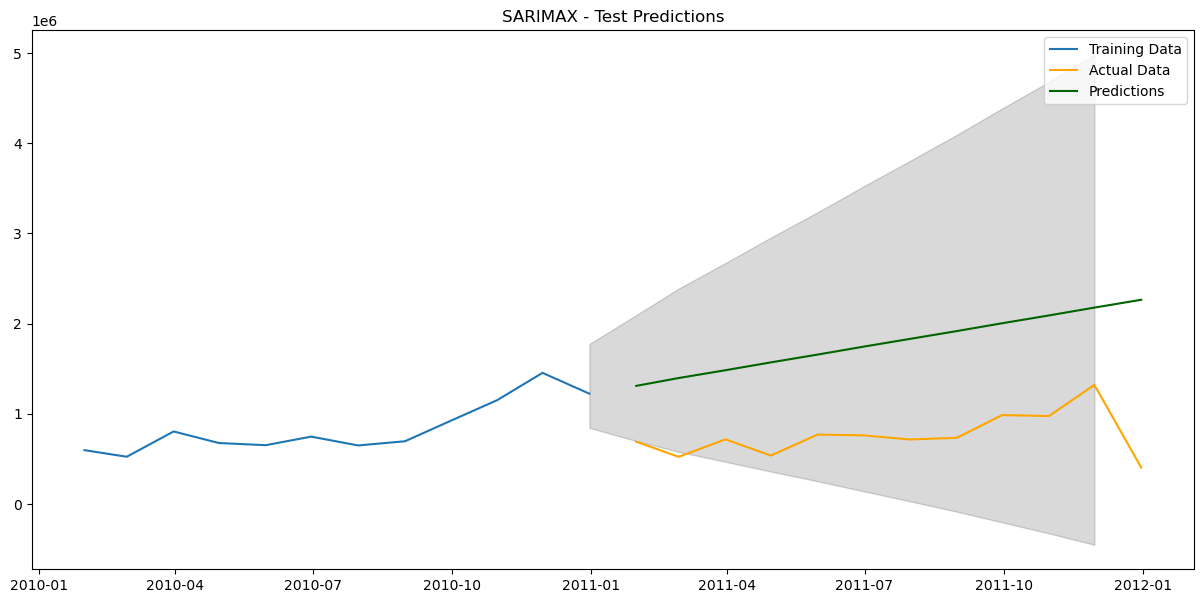

In [31]:
results, mae, rmse, mape = sarimax_forecast(SARIMAX_model_test, data, periods=12, test=True)

In [22]:
results

,Actual,Predicted,Lower CI,Upper CI
2010-12-31,NaN,NaN,844982.025771,1.775170e+06
2011-01-31,690401.170,1.310076e+06,698726.745513,2.095023e+06
2011-02-28,523259.320,1.396875e+06,578897.699464,2.388450e+06
2011-03-31,717056.840,1.483674e+06,468082.716704,2.672862e+06
2011-04-30,537303.491,1.570473e+06,360095.079984,2.954448e+06
2011-05-31,770031.690,1.657271e+06,252040.350524,3.236100e+06
2011-06-30,761460.860,1.744070e+06,142364.371266,3.519374e+06
2011-07-31,715637.901,1.830869e+06,30162.764242,3.805173e+06
2011-08-31,733988.560,1.917668e+06,-85117.002980,4.094051e+06
2011-09-30,986359.562,2.004467e+06,-203821.837647,4.386353e+06


In [23]:
mean_absolute_percentage_error(results['Actual'].dropna(), results['Predicted'].dropna())

1.2725118489806602

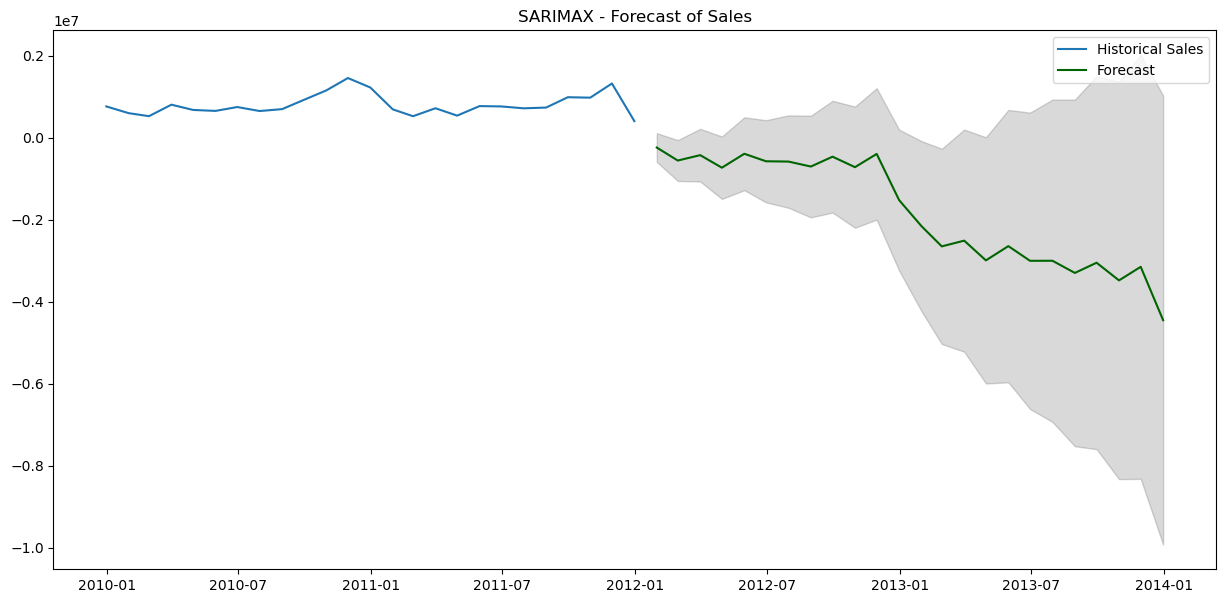

In [24]:
forecast_df = sarimax_forecast(SARIMAX_model, data, periods=24, test=False)

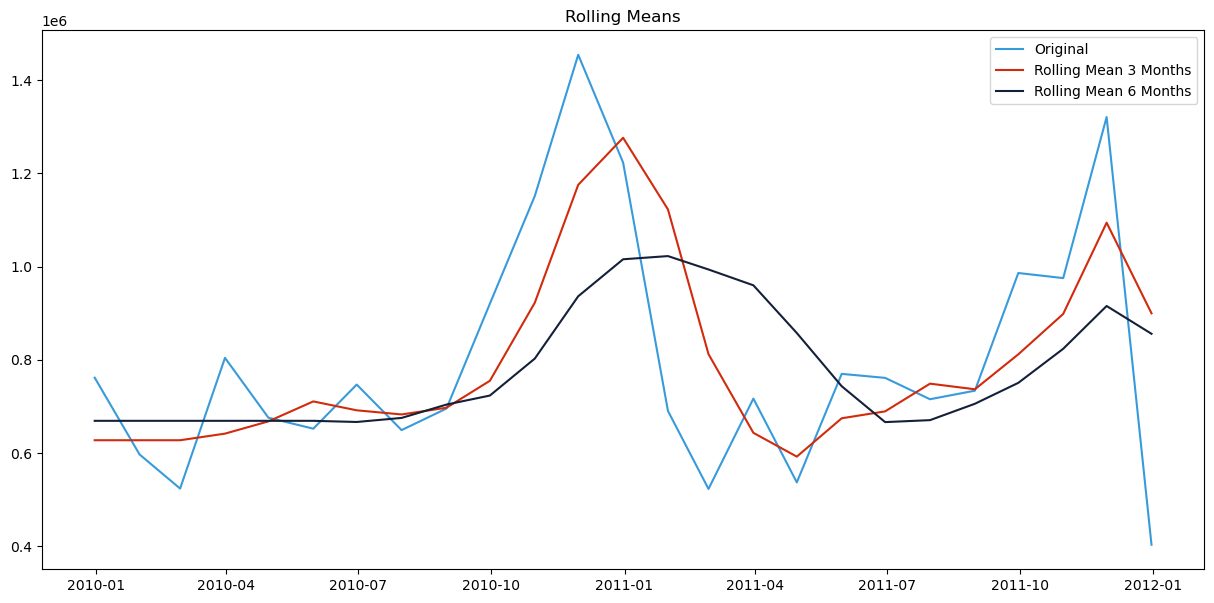

In [25]:
#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(data["sales"], color='#379BDB', label='Original')
plt.plot(data["rolling_mean_3"], color='#D22A0D', label='Rolling Mean 3 Months')
plt.plot(data["rolling_mean_6"], color='#142039', label='Rolling Mean 6 Months')
plt.legend(loc='best')
plt.title('Rolling Means')
plt.show(block=False)

In [26]:
ARIMA_model = pm.auto_arima(data['sales'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

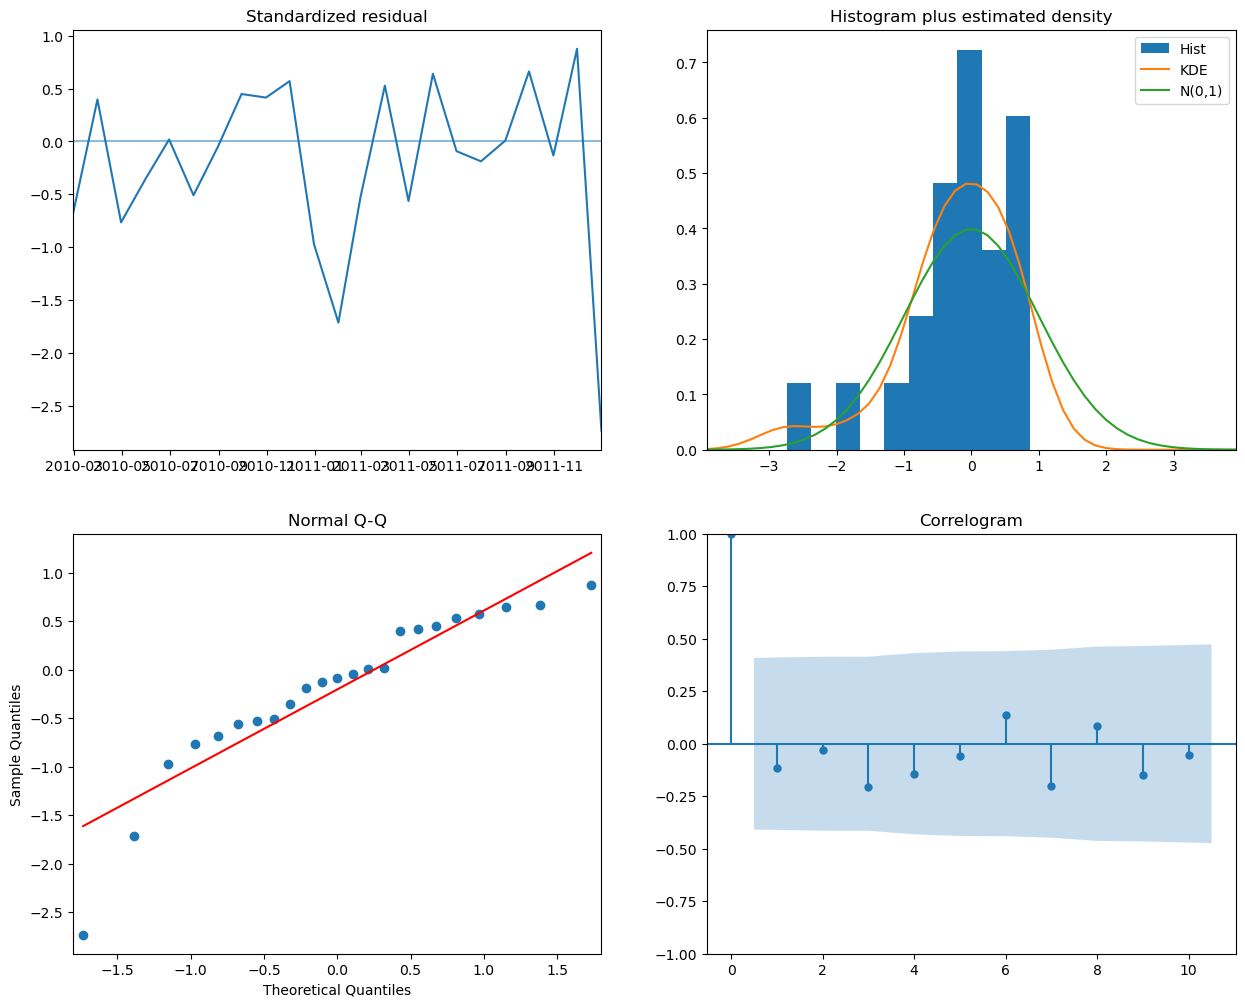

In [27]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

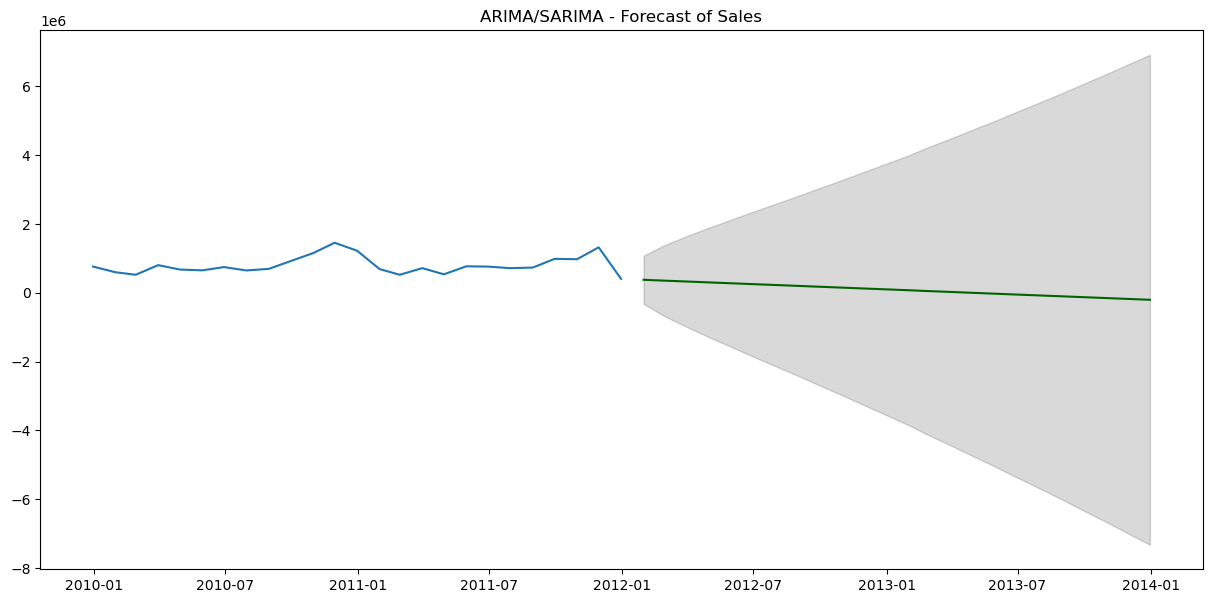

In [28]:
def forecast(ARIMA_model, periods=24):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(data.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted)
    lower_series = pd.Series(confint[:, 0], index=fitted.index)
    upper_series = pd.Series(confint[:, 1], index=fitted.index)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(data["sales"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Sales")
    plt.show()

forecast(ARIMA_model)

In [29]:
# def forecast_bias(y_true, y_pred):
#     return np.sum(y_true - y_pred) / np.sum(y_pred) * 100

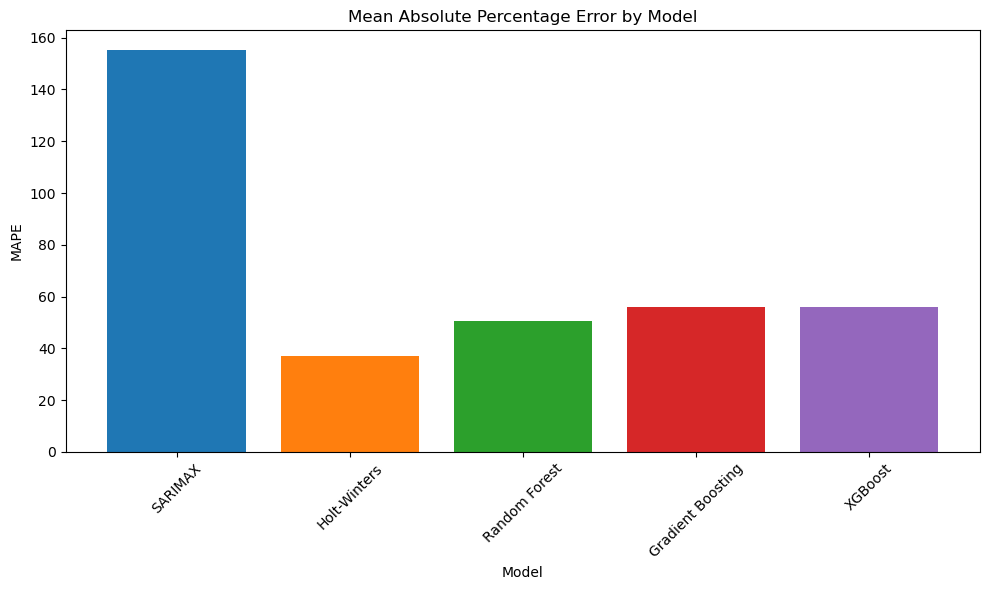

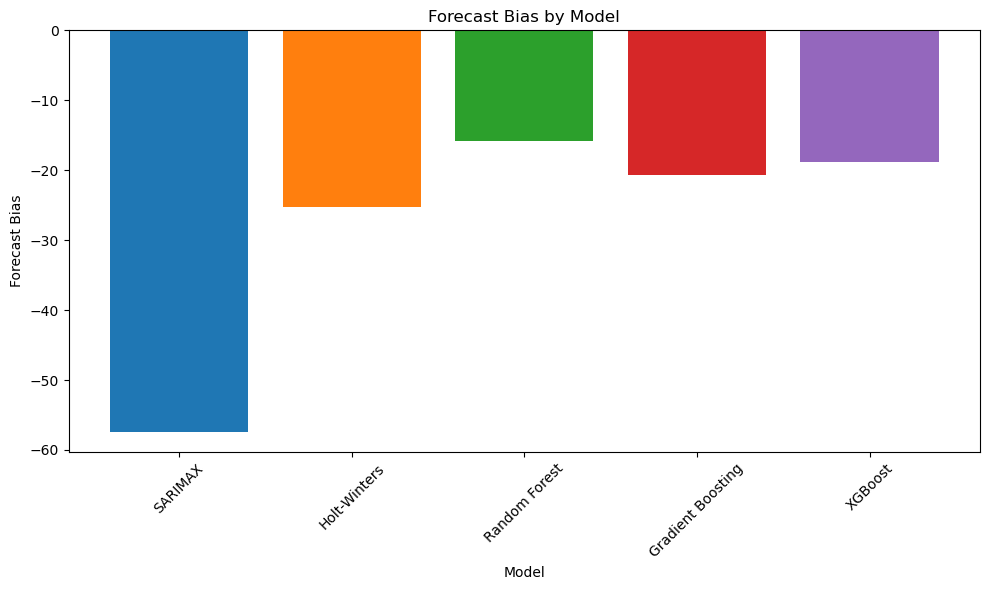

In [36]:
# chart of metrics
models = ['SARIMAX', 'Holt-Winters', 'Random Forest', 'Gradient Boosting', 'XGBoost']
mapes = [155.09, 37.12, 50.63, 55.99, 55.91] 
fbs = [-57.41, -25.28, -15.89, -20.74, -18.82]

metrics_df = pd.DataFrame({
    'Model': models,
    'MAPE': mapes,
    'Forecast Bias': fbs
})

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Plot bar chart for MAPE
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['MAPE'], color=colors)
plt.title('Mean Absolute Percentage Error by Model')
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bar chart for FB
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['Forecast Bias'], color=colors)
plt.title('Forecast Bias by Model')
plt.xlabel('Model')
plt.ylabel('Forecast Bias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
metrics_df

,Model,MAPE,Forecast Bias
0,SARIMAX,155.09,-57.41
1,Holt-Winters,37.12,-25.28
2,Random Forest,50.63,-15.89
3,Gradient Boosting,55.99,-20.74
4,XGBoost,55.91,-18.82
